# Practical Lab 6 - Logistic Regression using Iris Dataset

## Problem Statement

The goal is to classify the species of an Iris flower given the dimensions of parts of the flower into two classes virginica and non-virginica.


In [170]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go

## Importing the dataset

In [33]:
iris_dataset = datasets.load_iris(as_frame=True)
df_iris_dataset = iris_dataset.data
df_iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Segregating the target variable into two classes

In [47]:
df_iris_dataset['target'] = iris_dataset.target
df_iris_dataset['Species Name'] = iris_dataset.target_names[iris_dataset.target]
df_iris_dataset['target'] = df_iris_dataset['Species Name'].map({'virginica': 1, 'versicolor': 0, 'setosa': 0})
df_iris_dataset['Class Name'] = df_iris_dataset['target'].map({1:'Virginica', 0 : 'Non Virginica'})
df_iris_dataset.drop(columns=['Species Name'], axis=1, inplace=True)
df_iris_dataset.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Class Name
0,5.1,3.5,1.4,0.2,0,Non Virginica
1,4.9,3.0,1.4,0.2,0,Non Virginica
2,4.7,3.2,1.3,0.2,0,Non Virginica
3,4.6,3.1,1.5,0.2,0,Non Virginica
4,5.0,3.6,1.4,0.2,0,Non Virginica


## Exploratory Data Analysis

### Descriptive statistics

In [48]:
virginica_class = df_iris_dataset[df_iris_dataset['target'] == 1]
non_virginica_class = df_iris_dataset[df_iris_dataset['target'] == 0]

In [49]:
# Descriptive statistics of Virginica class
virginica_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,1.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,1.0
25%,6.22500,2.800000,5.100000,1.80000,1.0
50%,6.50000,3.000000,5.550000,2.00000,1.0
75%,6.90000,3.175000,5.875000,2.30000,1.0
max,7.90000,3.800000,6.900000,2.50000,1.0


In [37]:
# Descriptive statistics of non-virginica class
non_virginica_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,5.471000,3.099000,2.861000,0.786000,0.0
std,0.641698,0.478739,1.449549,0.565153,0.0
min,4.300000,2.000000,1.000000,0.100000,0.0
25%,5.000000,2.800000,1.500000,0.200000,0.0
50%,5.400000,3.050000,2.450000,0.800000,0.0
75%,5.900000,3.400000,4.325000,1.300000,0.0
max,7.000000,4.400000,5.100000,1.800000,0.0


### Histogram Plot

Histogram plot of features for each class has been plotted

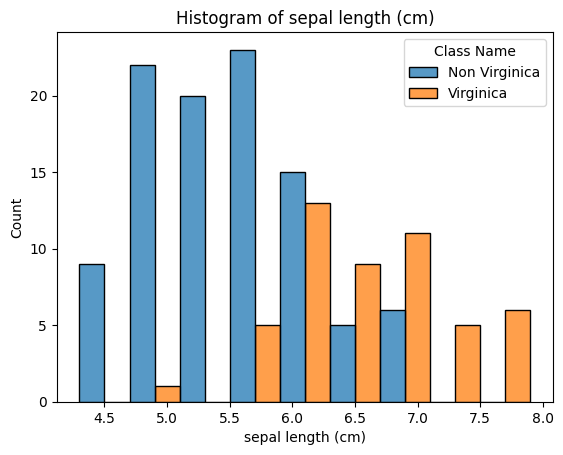

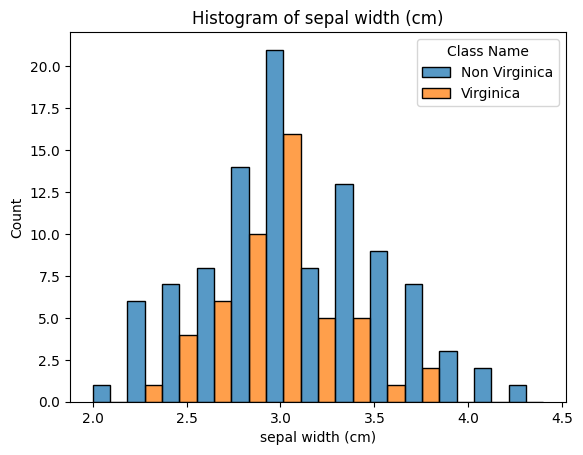

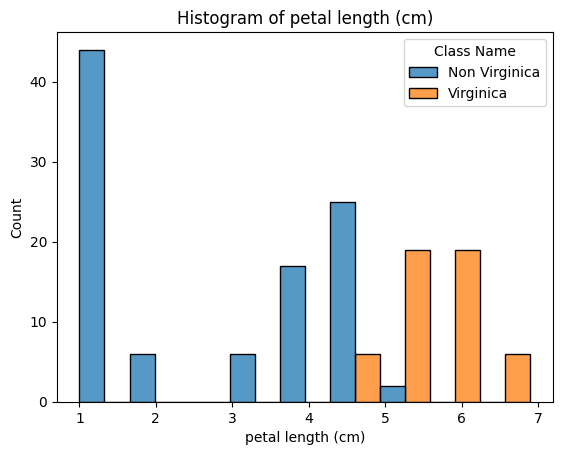

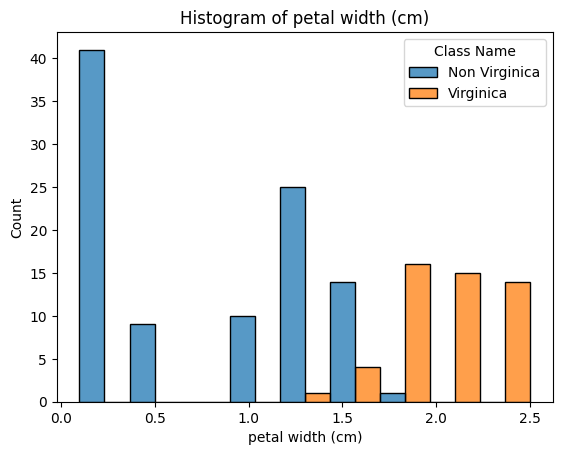

In [54]:
for feature in iris_dataset.feature_names:
    sns.histplot(data=df_iris_dataset, x= feature, hue = "Class Name",multiple="dodge")
    plt.title(f'Histogram of {feature}')
    plt.show()


### Correlation Matrix

From the correlation matrix, it is observed that petal length and petal width are highly correlated with a correlation coefficient of 0.96. While training the model, taking these two features together will not much improve the model performance. Petal length and sepal width are negatively correlated. First we will train the model with petal length only, then we will take two features such as petal length and sepal width. Then we will try with three features such petal length, sepal width and sepal length. Finally with all the features together.

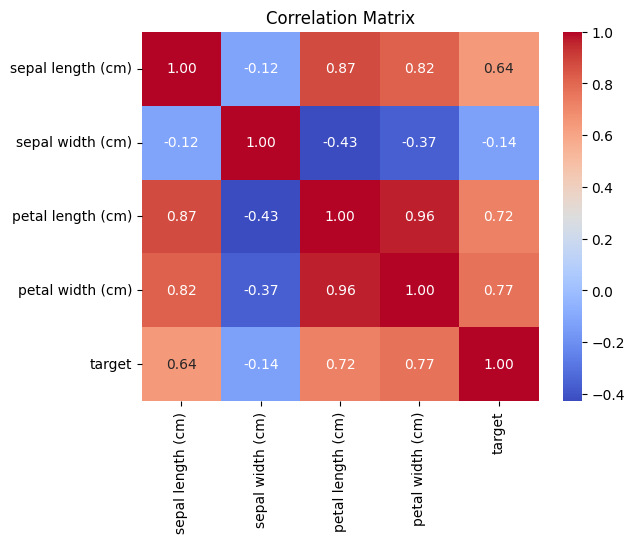

In [71]:
df_iris_dataset_features = df_iris_dataset.iloc[:,0:5]
corr_matrix = df_iris_dataset_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

### Box plot

Box plot shows the distribution of feature values for each class. It is also used to detect outliers. There are only four outlier data points. It calculates the minimum and maximum whisker, mean, IQR to plot the box plot.

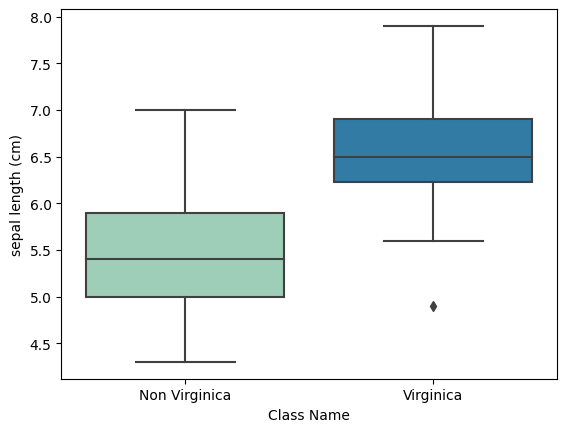

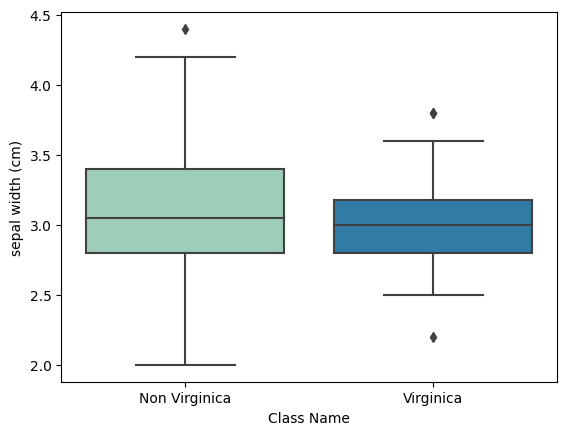

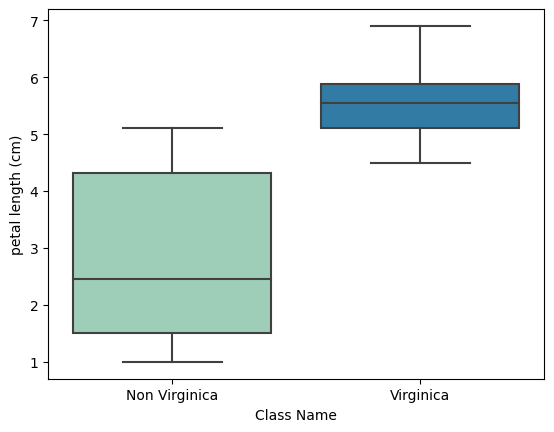

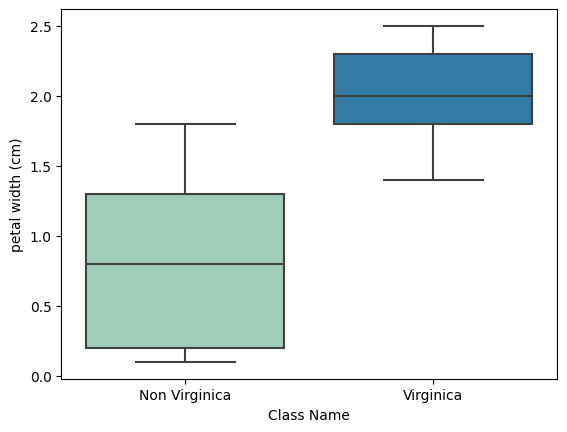

In [69]:
for feature in iris_dataset.feature_names:
    sns.boxplot(x='Class Name',y=feature,data=df_iris_dataset ,palette='YlGnBu')
    plt.show()

### PairPlot

Pairplot is plotted between all the four features. The plots on the diagonal shows the distribution of data points for each feature variables. Also it shows the correlation between each variable simulatenously. From the pairplot, we can identify multicollinerity between feature variables. The scatterplot shows the relationship between two feature variables.

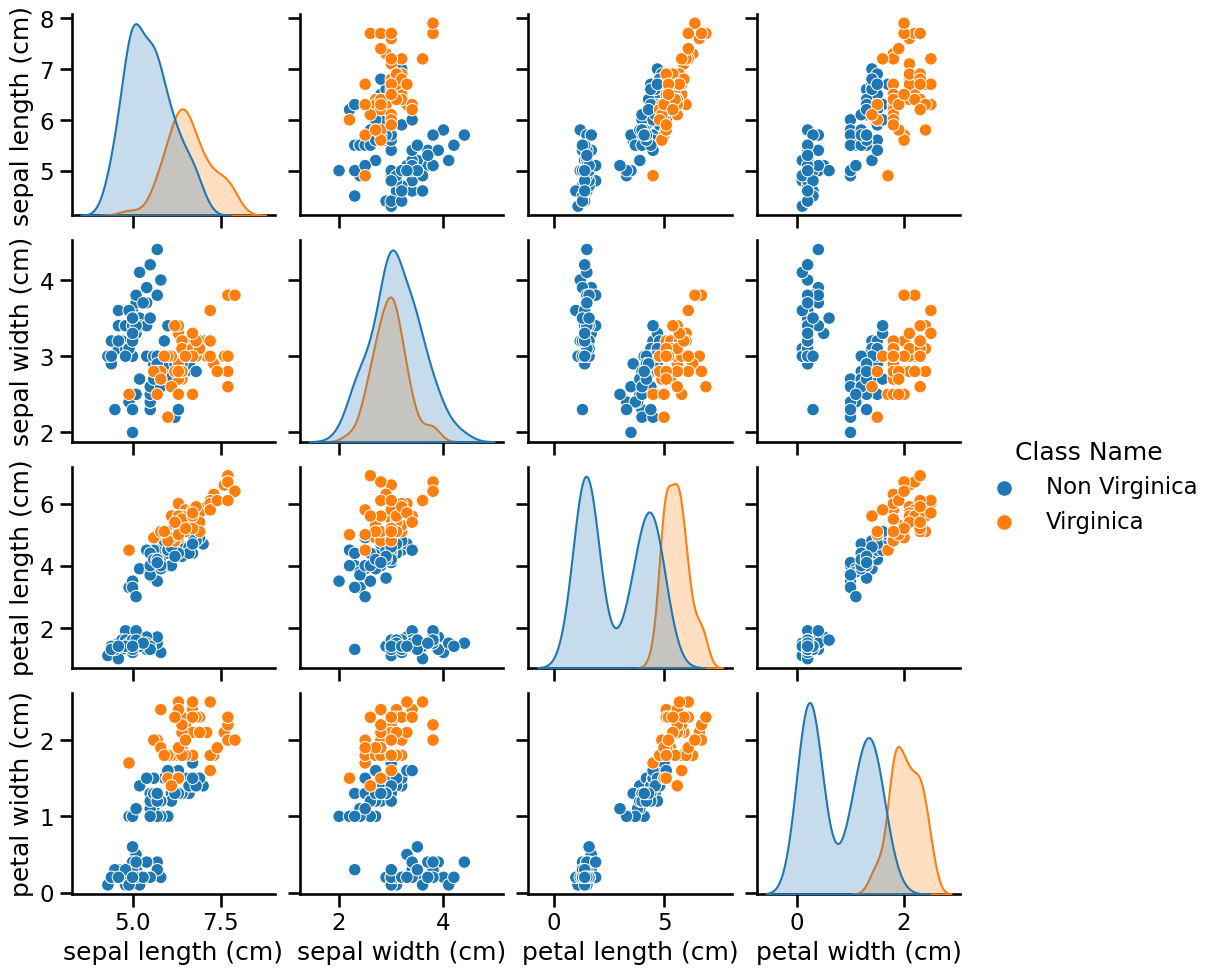

In [74]:
sns.set_context('talk')
sns.pairplot(df_iris_dataset, x_vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)","petal width (cm)"],y_vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)","petal width (cm)"],hue='Class Name')

### Regression Plot

The regression plot is used to identify linear relationship between feature variables. Here the graph is plotted by taking sepal width on x axis and petal length on y axis. It also helps us to identify outliers.

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

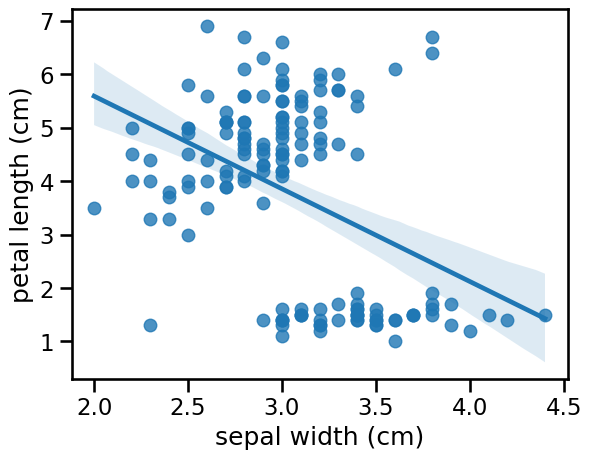

In [76]:
sns.regplot(x='sepal width (cm)', y='petal length (cm)', data=df_iris_dataset)

The above boxplot, pairplot and regression plot ideas are taken from Kaggle [EDA on IRIS-dataset and ML models](https://www.kaggle.com/code/ishadss/eda-on-iris-dataset-and-ml-models)

## Insights obtained from EDA
1. The total size of the dataset is 150 records. Out of 150, 50 records are virginica and 100 records are non-virginica.
2. Petal length and petal width are highly correlated. so, if we use the two features together it will not much improve the model performance.
3. there are four datapoint values in sepal width and length as outlier which will not much impact the model performance.
4. Sepal width and petal length are negatively correlated. when sepal width increases, petal length will decrease.
5. Sepal width data points are normally distributed.
6. We can easily classify the species as virginica and non-virginica based on petal length alone.  

## Splitting the dataset into Training, Validation and test sets

Training dataset - 120 records
Testing and validation dataset contains 15 records each

In [186]:
X = df_iris_dataset.drop(columns=['target','Class Name'])
y = df_iris_dataset['target']

# Split the data into train and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=30, random_state=0)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

## Model training and Evaluation on Validation Test

In [194]:
accuracy_values = []
# Model considering only one feature petal length in cm 
log_reg_model_univariate = LogisticRegression(random_state=42)
log_reg_model_univariate.fit(X_train[['petal length (cm)']],y_train)
y_val_pred = log_reg_model_univariate.predict(X_val[['petal length (cm)']])
# Evaluation of the model on validation set
test_results = np.c_[
    log_reg_model_univariate.predict_proba(X_val[['petal length (cm)']])[:,1], 
    y_val_pred,
    y_val
]
columns=[
    'Probability of predicting virginica',
    'Model Prediction',
    'Ground Truth'
]
df_val_test_results = pd.DataFrame(test_results, columns=columns)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy_values.append(accuracy)
df_val_test_results.head(15)

,Probability of predicting virginica,Model Prediction,Ground Truth
0,0.555281,1.0,1.0
1,0.060976,0.0,0.0
2,0.000024,0.0,0.0
3,0.000009,0.0,0.0
4,0.000018,0.0,0.0
5,0.000013,0.0,0.0
6,0.000009,0.0,0.0
7,0.060976,0.0,0.0
8,0.392946,0.0,0.0
9,0.000003,0.0,0.0


In [195]:
# Model considering two features petal length and sepal width
log_reg_model_two = LogisticRegression(random_state=42)
log_reg_model_two.fit(X_train[['petal length (cm)','sepal width (cm)']],y_train)
y_val_pred = log_reg_model_two.predict(X_val[['petal length (cm)','sepal width (cm)']])
# Evaluation of the model on validation set
test_results = np.c_[
    log_reg_model_two.predict_proba(X_val[['petal length (cm)', 'sepal width (cm)']])[:,1], 
    y_val_pred,
    y_val
]
columns=[
    'Probability of predicting virginica',
    'Model Prediction',
    'Ground Truth'
]
df_val_test_results = pd.DataFrame(test_results, columns=columns)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy_values.append(accuracy)
df_val_test_results.head(15)

,Probability of predicting virginica,Model Prediction,Ground Truth
0,0.560629,1.0,1.0
1,0.070007,0.0,0.0
2,0.000019,0.0,0.0
3,0.000007,0.0,0.0
4,0.000014,0.0,0.0
5,0.000011,0.0,0.0
6,0.000006,0.0,0.0
7,0.060679,0.0,0.0
8,0.378547,0.0,0.0
9,0.000003,0.0,0.0


In [196]:
# Model considering three features petal length, sepal width and sepal length
log_reg_model_three = LogisticRegression(random_state=42)
log_reg_model_three.fit(X_train[['petal length (cm)','sepal width (cm)','sepal length (cm)']],y_train) 
y_val_pred = log_reg_model_three.predict(X_val[['petal length (cm)','sepal width (cm)','sepal length (cm)']])
# Evaluation of the model on validation set
test_results = np.c_[
    log_reg_model_three.predict_proba(X_val[['petal length (cm)', 'sepal width (cm)','sepal length (cm)']])[:,1], 
    y_val_pred,
    y_val
]
columns=[
    'Probability of predicting virginica',
    'Model Prediction',
    'Ground Truth'
]
df_val_test_results = pd.DataFrame(test_results, columns=columns)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy_values.append(accuracy)
df_val_test_results.head(15)

,Probability of predicting virginica,Model Prediction,Ground Truth
0,0.589040,1.0,1.0
1,0.066946,0.0,0.0
2,0.000020,0.0,0.0
3,0.000007,0.0,0.0
4,0.000014,0.0,0.0
5,0.000012,0.0,0.0
6,0.000006,0.0,0.0
7,0.058425,0.0,0.0
8,0.356519,0.0,0.0
9,0.000003,0.0,0.0


In [197]:
# Model considering all four features petal length, sepal width, sepal length and sepal width
log_reg_model_multivariate = LogisticRegression(random_state=42)
log_reg_model_multivariate.fit(X_train,y_train)
y_val_pred = log_reg_model_multivariate.predict(X_val)
# Evaluation of the model on validation set
test_results = np.c_[
    log_reg_model_multivariate.predict_proba(X_val)[:,1], 
    y_val_pred,
    y_val
]
columns=[
    'Probability of predicting virginica',
    'Model Prediction',
    'Ground Truth'
]
df_val_test_results = pd.DataFrame(test_results, columns=columns)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy_values.append(accuracy)
df_val_test_results.head(15)

,Probability of predicting virginica,Model Prediction,Ground Truth
0,0.731737,1.0,1.0
1,0.034201,0.0,0.0
2,0.000012,0.0,0.0
3,0.000004,0.0,0.0
4,0.000006,0.0,0.0
5,0.000007,0.0,0.0
6,0.000004,0.0,0.0
7,0.048543,0.0,0.0
8,0.284518,0.0,0.0
9,0.000002,0.0,0.0


### Accuracy of all the four models on validation set

The accuracy of all the four models is 100%.

In [198]:
model_names = ['Model 1 - (petal length)', 'Model 2 - (petal length, sepal width)','Model 3 - (Petal length, sepal width and length)','Model 4 - all features']
accuracy_results = np.c_[
    model_names,
    accuracy_values
]
df_accuracy = pd.DataFrame(accuracy_results,columns = ['Model Name', 'Accuracy'])
df_accuracy

,Model Name,Accuracy
0,Model 1 - (petal length),1.0
1,"Model 2 - (petal length, sepal width)",1.0
2,"Model 3 - (Petal length, sepal width and length)",1.0
3,Model 4 - all features,1.0


## Plotting Decision boundary

### Decision boundary for model with only one feature - Petal length (cm)

In [117]:
# finding the decision boundary
decision_boundary = -log_reg_model_univariate.intercept_ / log_reg_model_univariate.coef_
print(decision_boundary)

[[4.87124795]]


### Decision boundary for logistic regression model with two features - Petal length and sepal width

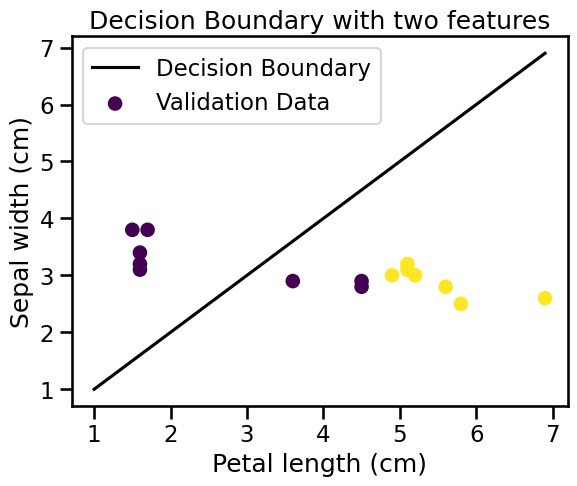

In [167]:
decision_boundary_x1 = np.linspace(X.iloc[:,[2]].min(), X.iloc[:,[2]].max(), 10)
decision_boundary_x2 = -log_reg_model_two.intercept_ / log_reg_model_two.coef_[0][1] - log_reg_model_two.coef_[0][0] / log_reg_model_two.coef_[0][1] * decision_boundary_x1
plt.plot(decision_boundary_x1, decision_boundary_x1, label='Decision Boundary', color='black')

# Plot the training data points
plt.scatter(X_val.iloc[:,[2]], X_val.iloc[:,[1]], c=y_val, label='Validation Data')
#plt.scatter(X_train.iloc[:,[2]], X_train.iloc[:,[1]], c=y_train, label='Training Data')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Decision Boundary with two features')
plt.legend()
plt.show()

### Decision boundary for model with three features - Petal length,Sepal width and length

In [185]:
y_pred = log_reg_model_two.predict(X_val[['petal length (cm)','sepal width (cm)']])
fig = px.scatter_3d(
    x=X_val.iloc[:, 2],
    y=X_val.iloc[:, 1],
    z=X_val.iloc[:,0]
)
x1, x2 = np.meshgrid((np.linspace(X.iloc[:,[2]].min(), X.iloc[:,[2]].max(), 10)), (np.linspace(X.iloc[:,[1]].max(), X.iloc[:,[1]], 10)))
decision_boundary_x3 = -log_reg_model_three.intercept_ / log_reg_model_three.coef_[0][2] - log_reg_model_three.coef_[0][0] / log_reg_model_three.coef_[0][2] * x1 - log_reg_model_three.coef_[0][1] / log_reg_model_three.coef_[0][2] * x2
# Create a surface plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Petal Length'),
        yaxis=dict(title='Sepal Width'),
        zaxis=dict(title='Sepal length')
    )
)
fig.add_trace(go.Surface(x=x1, y=x2, z=decision_boundary_x3,colorscale='Reds',showscale=False,opacity=0.6,name='Decision Boundary'))

fig.show()

## Conclusion
### Failure Modes of Model:

The accuracy of all four models is 100% on validation set. It seems like the model is overfitting the dataset. It is because the dataset is small in size containing only 150 records and we have used maximum of 120 records for training and we have used only 15 records for validation and testing each

### Best Model

I believe that logistic regression model with only one feature performs the same as the model taking four features on validation set. So, by using only petal length feature, we can effectively classify the species as virginica or non-virginica. The accuracy of the model taking only petal length as feature on testing dataset is 93%. It calssified only one datapoint wrongly as non-virginica which is actually virginica species.|

In [205]:
y_pred_test = log_reg_model_univariate.predict(X_test[['petal length (cm)']])
test_data_accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy on testing dataset ",test_data_accuracy)
# Evaluation of the model on validation set
test_results = np.c_[
    log_reg_model_univariate.predict_proba(X_test[['petal length (cm)']])[:,1], 
    y_pred_test,
    y_test
]
columns=[
    'Probability of predicting virginica',
    'Model Prediction',
    'Ground Truth'
]
df_val_test_results = pd.DataFrame(test_results, columns=columns)
df_val_test_results.head(15)

Accuracy on testing dataset  0.9333333333333333


,Probability of predicting virginica,Model Prediction,Ground Truth
0,0.000013,0.0,0.0
1,0.006472,0.0,0.0
2,0.317901,0.0,0.0
3,0.925632,1.0,1.0
4,0.000066,0.0,0.0
5,0.473411,0.0,1.0
6,0.148186,0.0,0.0
7,0.251256,0.0,0.0
8,0.194597,0.0,0.0
9,0.000066,0.0,0.0
